# Classification

In [2]:
import numpy as np, matplotlib.pyplot as plt, math
import scipy.stats as scp
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


*1. Using a little bit of algebra, prove that the following two equations are equivalent. In other words, the logistic function representation and logit representation for the logistic regression model are equivalent.*

$$
p(X) = \frac{e^{\beta_{0} + \beta_{1}X}}{1 + e^{\beta_{0} + \beta_{1}X}}
$$
$$
\frac{p(X)}{1 - p(X)} = e^{\beta_{0} + \beta_{1}X}
$$

What we are trying to show is that,

$$
1 - p(X) = \frac{1}{1 + e^{\beta_{0} + \beta_{1}X}}
$$

Because,

$$
\frac{e^{\beta_{0} + \beta_{1}X}}{1 + e^{\beta_{0} + \beta_{1}X}} / \frac{1}{1 + e^{\beta_{0} + \beta_{1}X}} = e^{\beta_{0} + \beta_{1}X}
$$

This is quite simple. We input the expression for $p(X)$ and then combine the fractions

$$
1 - p(X) = 1 - \frac{e^{\beta_{0} + \beta_{1}X}}{1 + e^{\beta_{0} + \beta_{1}X}}
$$
$$
1 - p(X) = \frac{1 + e^{\beta_{0} + \beta_{1}X}}{1 + e^{\beta_{0} + \beta_{1}X}} - \frac{e^{\beta_{0} + \beta_{1}X}}{1 + e^{\beta_{0} + \beta_{1}X}}
$$
$$
1 - p(X) = \frac{1}{1 + e^{\beta_{0} + \beta_{1}X}}
$$

*2. Prove that under the assumption that the observations in the kth class are drawn from a $N(μ_{k}, \sigma^{2})$ distribution, the Bayes classifier assigns an observation to the class for which the discriminant function is maximized.*

The discriminant function is,

$$
\delta_{k}(x) = x \frac{\mu_{k}}{\sigma^{2}} - \frac{\mu^{2}_{k}}{2\sigma^{2}} + log(\pi_{k})
$$

The Bayes classifier assigns an observation to class for which $P(y=k|X)$ is greatest. Under the assumption that observation are drawn from a $N(μ_{k}, \sigma^{2})$ distribution then this conditional probability is equal to

$$
p_{k}(x) = \frac{\pi_{k} \frac{1}{\sqrt{2\pi}\sigma} e^{(- \frac{1}{2\sigma^{2}}(x - \mu_{k})^{2})}}{\sum_{l=1}^{K}\pi_{l} \frac{1}{\sqrt{2\pi\sigma}} e^{(- \frac{1}{2\sigma^{2}}(x - \mu_{l})^{2})}}
$$

Hence we must show that we can transform this expression for the conditional probability of the response belonging to kth class given the predictor X into the discriminant function. First note that the denominator is irrelevant as it will be the same for all classes. Then also note that $\frac{1}{\sqrt{2\pi}\sigma}$ cancels. We take the log of the numerator for,

$$
ln(\pi_{k} e^{(- \frac{1}{2\sigma^{2}}(x - \mu_{k})^{2})}) = ln(\pi_{k}) - \frac{1}{2\sigma^{2}}(x^{2} - 2x\mu_{k} + \mu_{k}^{2})
$$
$$
= ln(\pi_{k}) - \frac{x^{2}}{2\sigma^{2}} + \frac{2x\mu_{k}}{2\sigma^{2}} - \frac{\mu_{k}^{2}}{2\sigma^{2}}
$$
$$
= ln(\pi_{k})  + \frac{x\mu_{k}}{\sigma^{2}} - \frac{\mu_{k}^{2}}{2\sigma^{2}}
$$

Where we have dropped every expressionn that does not depend on k.

*3. This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a classspecific mean vector and a class specific covariance matrix. We consider the simple case where p = 1; i.e. there is only one feature. Suppose that we have K classes, and that if an observation belongs to the kth class then X comes from a one-dimensional normal distribution, $X \sim N(μ^{k}, \sigma^{2}_{k})$. Prove that in this case, the Bayes classifier is not linear. Argue that it is in fact quadratic.*

This is very similar to the question above, with the exception that $\sigma_{k}^{2}$ does change with k, we have removed the assumption of common variance, and hence is included in the maximisation of the discriminant. This means are maximising

$$
ln(\pi_{k}) - \frac{x^{2}}{2\sigma_{k}^{2}} + \frac{2x\mu_{k}}{2\sigma_{k}^{2}} - \frac{\mu_{k}^{2}}{2\sigma_{k}^{2}}
$$

Which is quadratic in X

*4. When the number of features p is large, there tends to be a deterioration in the performance of KNN and other local approaches that perform prediction using only observations that are near the test observation for which a prediction must be made. This phenomenon is known as the curse of dimensionality, and it ties into the fact that  parametric approaches often perform poorly when p is large. We will now investigate this curse.*

*(a) Suppose that we have a set of observations, each with measurements on p = 1 feature, X. We assume that X is uniformly (evenly) distributed on [0, 1]. Associated with each observation is a response value. Suppose that we wish to predict a test observation’s response using only observations that are within 10 % of the range of X closest to that test observation. For instance, in order to predict the response for a test observation with X = 0.6, we will use observations in the range [0.55, 0.65]. On average, what fraction of the available observations will we use to make the prediction?*

We are told that $X \sim U(0, 1)$ this means our density function is

$$
f(x) = \frac{1}{1 - 0}
$$

Therefore, the probability that X takes on a value in the interval [0.55, 0.65] is,

$$
P(0.55 \le X \le 0.65) = \int_{0.55}^{0.65}f(x) dx
$$
$$
= [x]^{0.65}_{0.55} = 0.65 - 0.55 = 0.1
$$

On average we will use 10% of the observations to make a prediction.

*(b) Now suppose that we have a set of observations, each with measurements on p = 2 features, $X_{1}$ and $X_{2}$. We assume that $(X_{1},X_{2})$ are uniformly distributed on [0, 1] × [0, 1]. We wish to predict a test observation’s response using only observations that are within 10 % of the range of $X_{1}$ and within 10 % of the range of $X_{2}$ closest to that test observation. For instance, in order to predict the response for a test observation with $X_{1} = 0.6$ and $X_{2} = 0.35$, we will use observations in the range [0.55, 0.65] for $X_{1}$ and in the range [0.3, 0.4] for $X_{2}$. On average, what fraction of the available observations will we use to make the prediction?*

Both random variables have the same density function given above. We will assume they're not correlated, although this information is not explicitly stated. If the random variables are uncorrelated then the probability that we find and $X_{1}$ in the interval [0.55, 0.65] and an $X_{2}$ in the interval [0.3, 0.4] is

$$
P(0.55 \le X_{1} \le 0.65, 0.3 \le X_{2} \le 0.4) = \int_{0.3}^{0.4}\int_{0.55}^{0.65}f(x_{1})f(x_{2})dx_{1}dx_{2}
$$
$$
\int_{0.3}^{0.4}f(x_{2})dx_{2}\int_{0.55}^{0.65}f(x_{1})dx_{1} = 0.1 \cdot 0.1 = 0.01
$$

*(c) Now suppose that we have a set of observations on p = 100 features. Again the observations are uniformly distributed on each feature, and again each feature ranges in value from 0 to 1. We wish to predict a test observation’s response using observations within the 10 % of each feature’s range that is closest to that test observation. What fraction of the available observations will we use to make the prediction?*

From the previous two questions it should be clear that each time we add another random variable with a $U(0, 1)$ distribution and consider 10% of the feature range closest the test observation that the probability of an observation being in that space decreases by a factor of 10. Lets call the event that an observation lands in that space, S, we have,

$$
P(S) = \frac{1}{10^{100}}
$$

*(d) Using your answers to parts (a)–(c), argue that a drawback of KNN when p is large is that there are very few training observations “near” any given test observation.*

It is clear that as increase the number predictors the probability that we find another observation close to X, the feature vector we are trying to make a prediction for, decreases exponentially with p. The problem is that for an observation to be near X, it needs to be near X in every single dimension which becomes less and less likely as we increase the number of dimensions.

*(e) Now suppose that we wish to make a prediction for a test observation by creating a p-dimensional hypercube centered around the test observation that contains, on average, 10 % of the training observations. For p = 1, 2, and 100, what is the length of each side of the hypercube? Comment on your answer.*

If we consider each predictor to be a $U(0, 1)$ random variable then for each value of p, to have a hypercube that contains an average of 10% of training observations we need to find the number $a$ where $a^{p} = 0.1$ or equivalently $\sqrt[p]{0.1}$. Therefore for p=1 we have a=0.1, for p=2 we have a=0.31, and for p=100 we have a=0.98. The significance of this finding is that each side of hypercube must be almost its maximum length just to contain 10% of the observations.


*(5) Examining the differences between LDA and QDA*


*(a) If the Bayes decision boundary is linear do we expect LDA or QDA to perform better on the training set? On the test set?*

Even though the true decision boundary is linear we still might expect the QDA model to perform better on the training set, i.e. to have a lower training error. This is because QDA is a more flexible model and hence will overfit to the noise in the training data producing a lower training error rate. However, when we test the models on the test dataset we will find that LDA performs better. This is for the same reason as above, the QDA model will have overfit to the noise in the training data and as a result will perform poorly on the test data. In the language of statistical learning, for the QDA there will be an increase in variance which is not offset by a decrease in bias. 

We demonstrate this below. The first plot clearly shows the bayes decision boundary for the classes is linear. We then run 100 simulations for the same probability distributions, capturing the training and test error for both models. We can see in the boxplots that the training error tends to be slightly lower for QDA and the test error lower for LDA.

In [3]:
class_1 = np.hstack([np.random.normal(loc=2, scale=1, size=50).reshape((-1,1)), np.random.normal(loc=4, scale=1, size=50).reshape((-1,1))])
class_2 = np.hstack([np.random.normal(loc=3, scale=1, size=50).reshape((-1,1)), np.random.normal(loc=2, scale=1, size=50).reshape((-1,1))])

In [4]:
#Calculate the bayes decision boundary
X = np.vstack([class_1, class_2])

pdf_1 = scp.multivariate_normal([2, 4])
pdf_2 = scp.multivariate_normal([3, 2])
prior_1 = 0.5
prior_2 = 0.5

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max()+1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max()+1

xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max))
pos = np.dstack((xx, yy))

P_x_c1 = pdf_1.pdf(pos)
P_x_c2 = pdf_2.pdf(pos)

posterior_1 = P_x_c1 * prior_1
posterior_2 = P_x_c2 * prior_2

boundary = (posterior_1 - posterior_2)

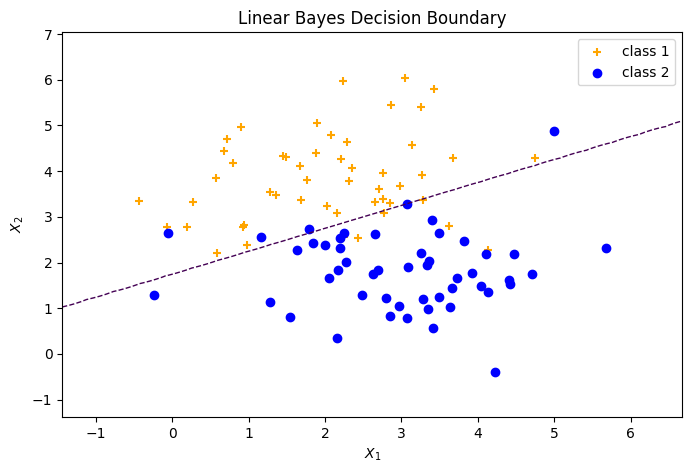

In [5]:
figure = plt.figure(figsize=(8, 5))
ax = figure.add_subplot()

ax.scatter(class_1[:, 0], class_1[:, 1], c='orange', marker='+', label='class 1')
ax.scatter(class_2[:, 0], class_2[:, 1], c='blue', marker='o', label='class 2')
ax.contour(xx, yy, boundary, levels=[0], linewidths=1, linestyles='--')

ax.set_xlabel('$X_{1}$')
ax.set_ylabel('$X_{2}$')
ax.set_title('Linear Bayes Decision Boundary')
ax.legend();

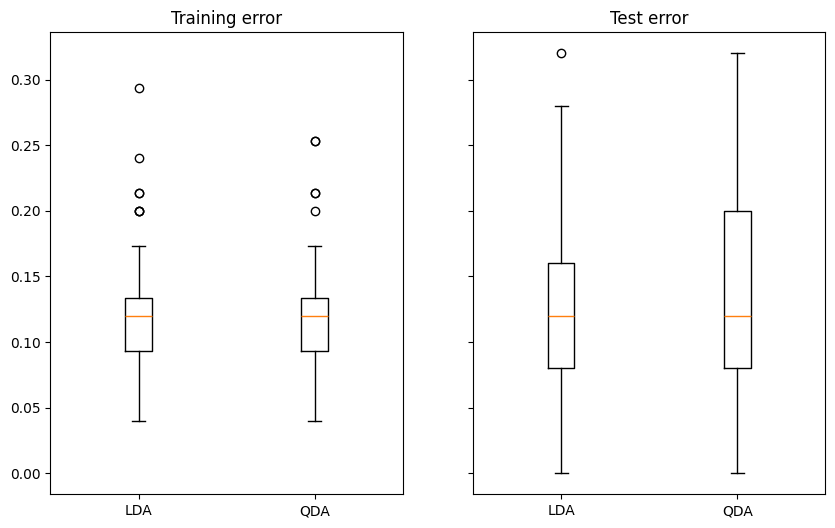

In [6]:
lda_train_error = []
lda_test_error = []
qda_train_error = []
qda_test_error = []
np.random.seed(5672)
for _ in range(100):
    class_1 = np.hstack([np.random.normal(loc=2, scale=1, size=50).reshape((-1,1)), np.random.normal(loc=4, scale=1, size=50).reshape((-1,1))])
    class_2 = np.hstack([np.random.normal(loc=3, scale=1, size=50).reshape((-1,1)), np.random.normal(loc=2, scale=1, size=50).reshape((-1,1))])
    
    X = np.vstack([class_1, class_2])
    y = np.hstack([np.zeros(class_1.shape[0]), np.ones(class_2.shape[0])])
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    lda = LDA().fit(x_train, y_train)
    qda = QDA().fit(x_train, y_train)

    lda_train_error.append(1 - accuracy_score(y_train, lda.predict(x_train)))
    qda_train_error.append(1 - accuracy_score(y_train, qda.predict(x_train)))

    lda_test_error.append(1 - accuracy_score(y_test, lda.predict(x_test)))
    qda_test_error.append(1 - accuracy_score(y_test, qda.predict(x_test)))

figure, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

ax[0].boxplot([lda_train_error, qda_train_error], labels=['LDA', 'QDA'])
ax[0].set_title('Training error')
ax[1].boxplot([lda_test_error, qda_test_error], labels=['LDA', 'QDA'])
ax[1].set_title('Test error');

*(b) If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set?*

If the boundary is non linear we would expect QDA to perform better on both the training and test datasets. This is because in this scenario, LDA will have high bias - it will not be able to correctly capture the functional form of the bayes decision boundary - leading to a higher error rate on both the training and test error rates.

*(c) In general, as the sample size n increases, do we expect the test prediction accuracy of QDA relative to LDA to improve, decline, or be unchanged? Why?* 

As the sample size increases we would expect the accuracy of QDA to improve relative to the LDA. This is because more flexible models require more observations to correctly fit the functional form of the predictors to the response and QDA being more flexible will be able to benefit from the increased sample size to a greater extent than LDA.

We see this demonstrated in the figure below. At small sample sizes the train accuracy of QDA tends to be less than than LDA (although sometimes it is greater). As we increase the sample size the relative accuracy approaches one. This is the case for a linear decision boundary - for a non linear boundary we would see the relative accuracy approach a number greater than 1.

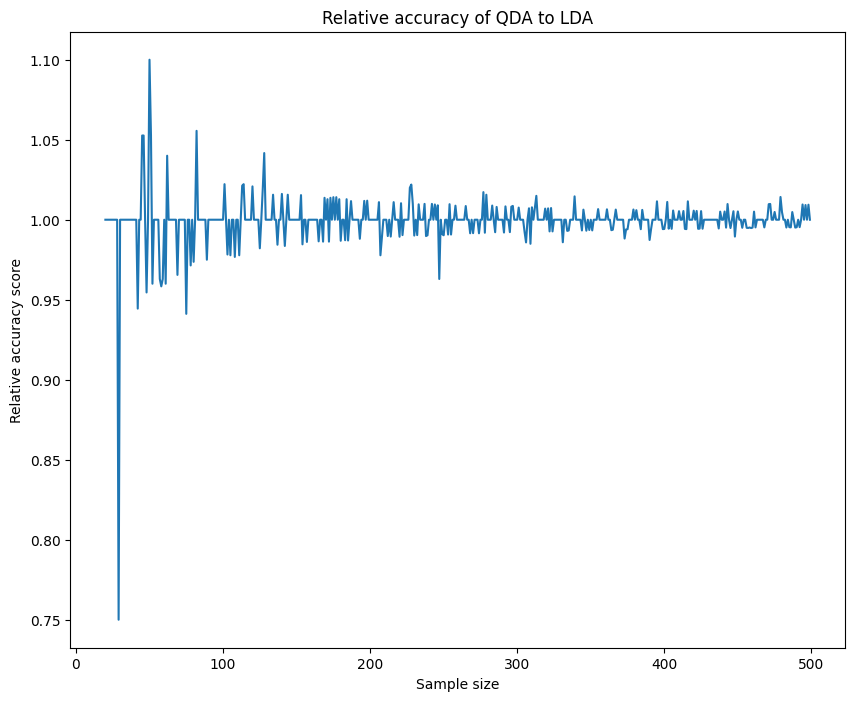

In [7]:
lda_accuracy = []
qda_accuracy = []
sample_size = []

for ss in range(20, 500):
    class_1 = np.hstack([np.random.normal(loc=2, scale=1, size=ss).reshape((-1,1)), np.random.normal(loc=4, scale=1, size=ss).reshape((-1,1))])
    class_2 = np.hstack([np.random.normal(loc=3, scale=1, size=ss).reshape((-1,1)), np.random.normal(loc=2, scale=1, size=ss).reshape((-1,1))])

    X = np.vstack([class_1, class_2])
    y = np.hstack([np.zeros(class_1.shape[0]), np.ones(class_2.shape[0])])
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    lda = LDA().fit(x_train, y_train)
    qda = QDA().fit(x_train, y_train)

    lda_accuracy.append(accuracy_score(y_test, lda.predict(x_test)))
    qda_accuracy.append(accuracy_score(y_test, qda.predict(x_test)))
    sample_size.append(ss)

relative_accuracy = [qda_accuracy[i] / lda_accuracy[i] for i in range(len(qda_accuracy))]

figure = plt.figure(figsize=(10, 8))
ax = figure.add_subplot()

ax.plot(sample_size, relative_accuracy, label='QDA relative accuracy')
ax.set_title('Relative accuracy of QDA to LDA')
ax.set_ylabel('Relative accuracy score')
ax.set_xlabel('Sample size');


*(6) Suppose we collect data for a group of students in a statistics class with variables $X_{1}$ = hours studied, $X_{2}$ = undergrad GPA, and Y = receive an A. We fit a logistic regression and produce estimated coefficient, $\hat{\beta}_{0} = −6$, $\hat{\beta}_{1} = 0.05$, $\hat{\beta}_{2} = 1$.*


*(a) Estimate the probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class.*

The probability estimate for this student achieving an *A* is,

$$
P(Y = 1| X) = \frac{e^{-6 + 40 \cdot 0.05 + 3.5}}{1 + e^{-6 + 40 \cdot 0.05 + 3.5}}
$$
$$
P(Y = 1| X) = 0.38
$$

Clearly, given the predictors this student is unlikely to achieve an A

In [8]:
p_y_1_x = math.e**(-6 + 40 * 0.05 + 3.5) /(1 + math.e**(-6 + 40 * 0.05 + 3.5))
p_y_1_x

0.37754066879814546

*(b) How many hours would the student in part (a) need to study to have a 50 % chance of getting an A in the class?*

We simply need to set the expression for the probability of Y given X above equal to 0.5 and for hours worked i.e. $\beta_{1}$. That is

$$
0.5 = \frac{e^{-6 + \beta_{1} \cdot 0.05 + 3.5}}{1 + e^{-6 + \beta_{1} \cdot 0.05 + 3.5}}
$$

We know from question 1 that,

$$
p(X)/1 - p(X) = e^{\beta_{0} + \beta{1}X_{1} + \beta_{2}X_{2}}
$$

Therefore

$$
1 = e^{-6 + \beta_{1} \cdot 0.05 + 3.5}
$$

Taking the log we have

$$
ln(1) = -6 + \beta_{1} \cdot 0.05 + 3.5
$$
$$
\beta_{1} = \frac{ln(1) + 2.5}{0.05}
$$
$$
\beta_{1} = 50
$$

The student would need to study for a total of 50 hours to have a 50/50 chance of achieving an A grade

In [9]:
beta_1 = (math.log(1) + 2.5)/0.05
beta_1

50.0

*(7) Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was $\bar{X} = 10$, while the mean for those that didn’t was $\bar{X} = 0$. In addition, the variance of X for these two sets of companies was $\sigma^{2} = 36$. Finally, 80 % of companies issued dividends. Assuming that X follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last year.*

Our response variable is whether a stock issued a dividend, lets call this Y and furthermore, lets say $Y=1$ if the stock issued a dividend and 0 otherwise. What we are trying to find is,

$$
P(Y = 1 | X) = \frac{\pi_{1}f_{1}(x)}{\pi_{1}f_{1}(x) + \pi_{2}f_{2}(x)}
$$

Therefore we have,

$$
P(Y = 1 | X) = \frac{0.8f_{1}(4)}{0.8f_{1}(4) + 0.2f_{2}(4)}
$$

Where

$$
f_{1}(x) \sim N(10, 36)
$$
$$
f_{2}(x) \sim N(0, 36)
$$

We find below that,

$$
P(Y = 1 | X) = 0.75
$$

It is likely given the data that this stock will pay a dividend


In [10]:
f1_x = scp.norm(loc=10, scale=6).pdf #scale takes std not variance
f2_x = scp.norm(loc=0, scale=6).pdf
p_dividend = (0.8 * f1_x(4))/(0.8 * f1_x(4) + 0.2 * f2_x(4))
p_dividend


0.7518524532975261

*9. This problem has to do with odds.*

*(a) On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default?*

An odds of 0.37 implies that,

$$
p(X) / (1 - p(X)) = 0.37
$$
$$
p(X) = 0.37 - 0.37p(X)
$$
$$
1.37p(X) = 0.37 
$$
$$
p(X) = 0.37 / 1.37 = 0.27
$$

That is on average 27 out of 100 people with an odds of 0.37 will default on their credit card

*(b) Suppose that an individual has a 16 % chance of defaulting on her credit card payment. What are the odds that she will default?*

A probability of default of 16% implies that,

$$
0.16 / 0.84 = odds
$$
$$
odds = 0.19
$$


10 DONE

*11. Work out the detailed forms of $a_{k}$, $b_{kj}$, and $b_{kjl}$ in (4.33) - see below. Your answer should involve $\pi_{k}$, $\pi_{K}$, $μ_{k}$, $μ_{K}$, $\Sigma_{k}$, and $\Sigma_{k}$.*

![alt text](<../images/Screenshot 2024-05-22 082538.png>)
